# Explore here

In [2]:
# Your code here
import pandas as pd
from sklearn.model_selection import train_test_split


url = "https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv"
df = pd.read_csv(url)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
df.shape

(20640, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Eliminar duplicados y elegir las columnas Latitude, Longitude y MedInc.

In [5]:
df_clustering = df[['Latitude', 'Longitude', 'MedInc']].copy()
df_clustering.drop_duplicates(subset=['Latitude', 'Longitude', 'MedInc'], keep='first', inplace=True)

print("Tamaño del conjunto de datos original:", df.shape)
print("Tamaño del conjunto de datos después de eliminar duplicados:", df_clustering.shape)
print("\nPrimeras filas del conjunto de datos después de eliminar duplicados:")
print(df_clustering.head())

Tamaño del conjunto de datos original: (20640, 9)
Tamaño del conjunto de datos después de eliminar duplicados: (20635, 3)

Primeras filas del conjunto de datos después de eliminar duplicados:
   Latitude  Longitude  MedInc
0     37.88    -122.23  8.3252
1     37.86    -122.22  8.3014
2     37.85    -122.24  7.2574
3     37.85    -122.25  5.6431
4     37.85    -122.25  3.8462


In [6]:
# Verificar si hay valores nulos en las columnas seleccionadas
null_values = df_clustering[['Latitude', 'Longitude', 'MedInc']].isnull().sum()

print("Número de valores nulos por columna:")
print(null_values)

Número de valores nulos por columna:
Latitude     0
Longitude    0
MedInc       0
dtype: int64


K-Means

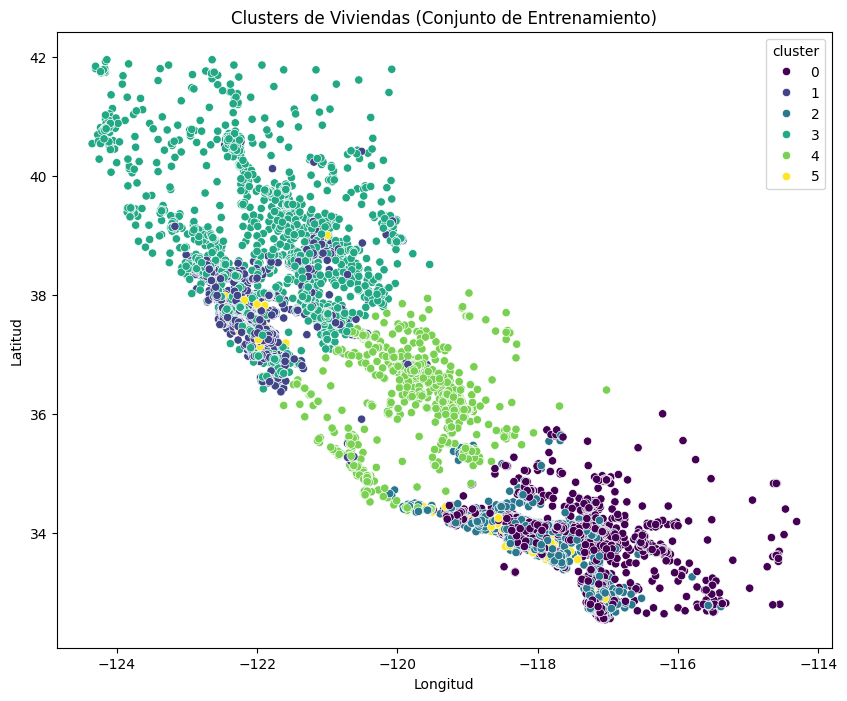


Primeras filas del conjunto de entrenamiento con la etiqueta del cluster:
       Latitude  Longitude  MedInc  cluster
19985     36.20    -119.31  3.1453        4
11235     33.81    -117.96  5.2384        2
2271      36.78    -119.80  3.5542        4
8660      33.85    -118.39  4.3594        2
6250      34.04    -117.98  3.4722        0

Valores únicos de la columna 'cluster': [4 2 0 3 1 5]

Centros de los clusters (Latitud, Longitud, MedInc):
[[  33.8240411  -117.8331261     2.8976853 ]
 [  37.71929103 -121.96531729    5.47726219]
 [  33.85441554 -118.01965203    5.60506601]
 [  38.36590439 -121.89718346    2.79968178]
 [  36.07593032 -119.73037806    2.69093514]
 [  35.1764     -119.53117143   11.17652657]]


In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.model_selection import train_test_split
train_df_housing, test_df_housing = train_test_split(df_clustering, test_size=0.2, random_state=42)


kmeans_housing = KMeans(n_clusters=6, random_state=42, n_init=10)
train_df_housing['cluster'] = kmeans_housing.fit_predict(train_df_housing[['Latitude', 'Longitude', 'MedInc']])


plt.figure(figsize=(10, 8))
sns.scatterplot(data=train_df_housing, x='Longitude', y='Latitude', hue='cluster', palette='viridis')
plt.title('Clusters de Viviendas (Conjunto de Entrenamiento)')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

print("\nPrimeras filas del conjunto de entrenamiento con la etiqueta del cluster:")
print(train_df_housing.head())
print("\nValores únicos de la columna 'cluster':", train_df_housing['cluster'].unique())
print("\nCentros de los clusters (Latitud, Longitud, MedInc):")
print(kmeans_housing.cluster_centers_)

In [8]:
# Obtener los centros de los clusters
centroids_housing = kmeans_housing.cluster_centers_
print("\nCoordenadas de los centroides de los clusters (Latitud, Longitud, MedInc):")
print(centroids_housing)


labels_housing_train = kmeans_housing.labels_
print("\nEtiquetas de cluster asignadas a cada punto del conjunto de entrenamiento:")
print(labels_housing_train[:10]) 


print("\nPrimeras filas del DataFrame de entrenamiento con la columna 'cluster':")
print(train_df_housing.head())


Coordenadas de los centroides de los clusters (Latitud, Longitud, MedInc):
[[  33.8240411  -117.8331261     2.8976853 ]
 [  37.71929103 -121.96531729    5.47726219]
 [  33.85441554 -118.01965203    5.60506601]
 [  38.36590439 -121.89718346    2.79968178]
 [  36.07593032 -119.73037806    2.69093514]
 [  35.1764     -119.53117143   11.17652657]]

Etiquetas de cluster asignadas a cada punto del conjunto de entrenamiento:
[4 2 4 2 0 3 4 0 2 0]

Primeras filas del DataFrame de entrenamiento con la columna 'cluster':
       Latitude  Longitude  MedInc  cluster
19985     36.20    -119.31  3.1453        4
11235     33.81    -117.96  5.2384        2
2271      36.78    -119.80  3.5542        4
8660      33.85    -118.39  4.3594        2
6250      34.04    -117.98  3.4722        0


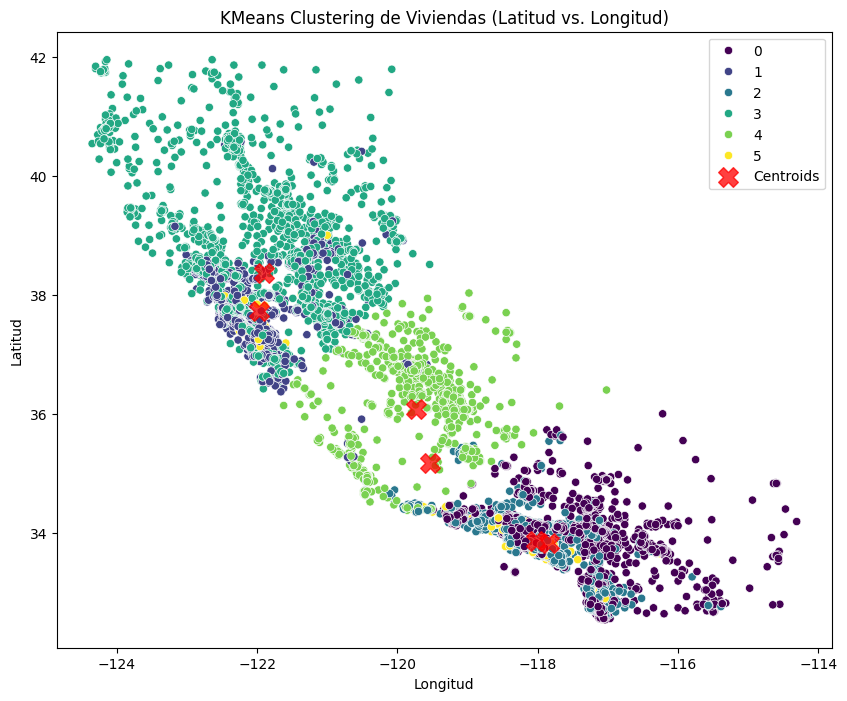

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizar los clusters utilizando Latitud y Longitud
plt.figure(figsize=(10, 8))
sns.scatterplot(data=train_df_housing, x='Longitude', y='Latitude', hue='cluster', palette='viridis')

# Visualizar los centroides de los clusters en el espacio de Latitud y Longitud
plt.scatter(kmeans_housing.cluster_centers_[:, 1], kmeans_housing.cluster_centers_[:, 0], marker='X', s=200, color='red', alpha=0.75, label='Centroids')

plt.title("KMeans Clustering de Viviendas (Latitud vs. Longitud)")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.legend()
plt.show()


Primeras filas del conjunto de prueba con la etiqueta del cluster predicha:
       Latitude  Longitude  MedInc  cluster
8572      33.90    -118.41  8.4680        2
1712      37.97    -122.32  3.9722        3
15916     37.74    -122.42  3.4583        3
5196      33.94    -118.27  1.6625        0
13583     34.13    -117.29  1.5156        0


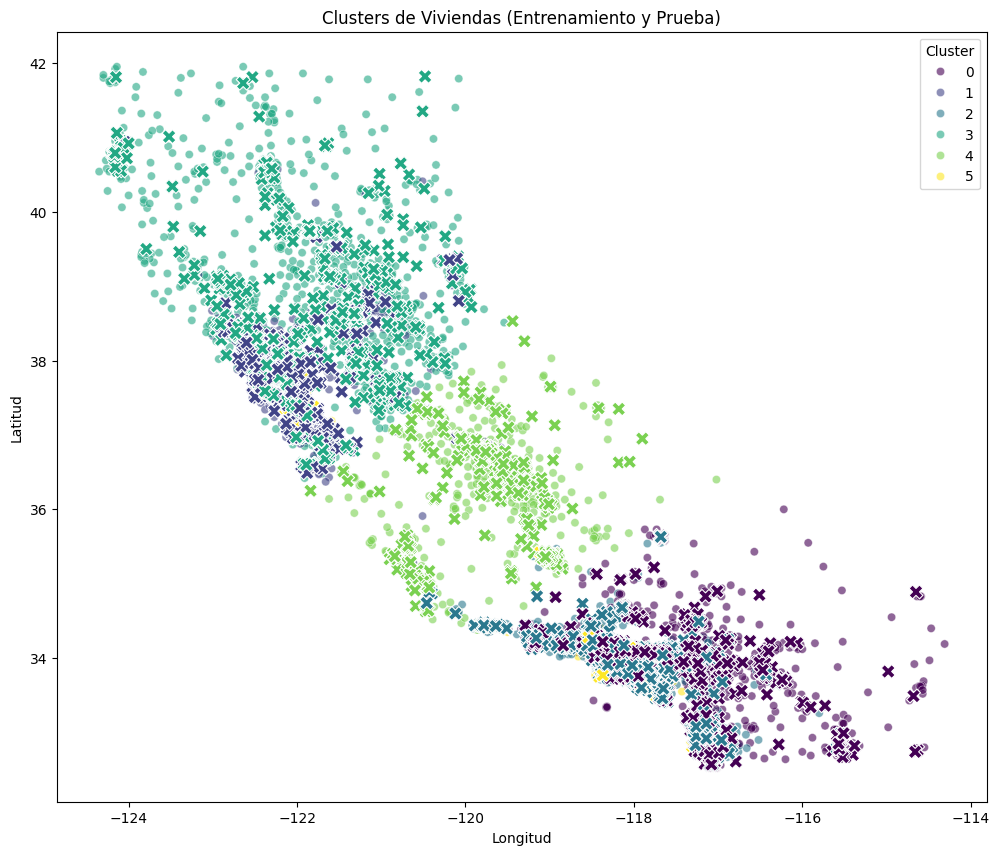

In [10]:
# Predecir los clusters para el conjunto de prueba
test_df_housing['cluster'] = kmeans_housing.predict(test_df_housing[['Latitude', 'Longitude', 'MedInc']])

print("\nPrimeras filas del conjunto de prueba con la etiqueta del cluster predicha:")
print(test_df_housing.head())

# Visualizar los clusters del conjunto de prueba junto con los del entrenamiento
plt.figure(figsize=(12, 10))
sns.scatterplot(data=train_df_housing, x='Longitude', y='Latitude', hue='cluster', palette='viridis', alpha=0.6, legend='full')
sns.scatterplot(data=test_df_housing, x='Longitude', y='Latitude', marker='X', s=100, hue='cluster', palette='viridis', legend=False)
plt.title('Clusters de Viviendas (Entrenamiento y Prueba)')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend(title='Cluster')
plt.show()

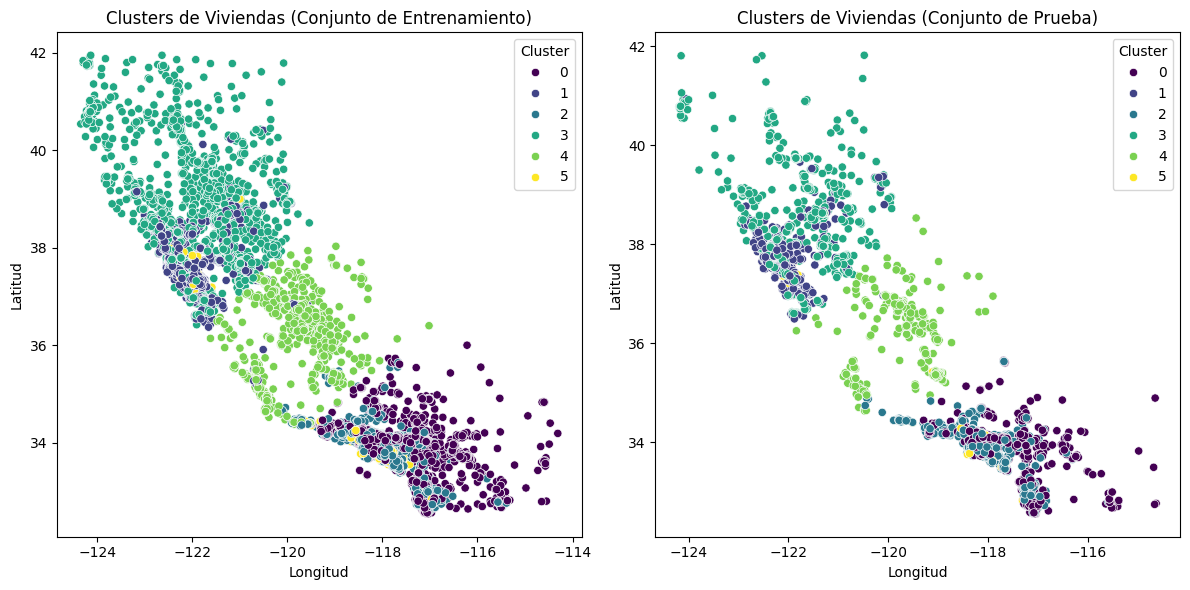

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico para el conjunto de entrenamiento
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=train_df_housing, x='Longitude', y='Latitude', hue='cluster', palette='viridis')
plt.title('Clusters de Viviendas (Conjunto de Entrenamiento)')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend(title='Cluster')

# Gráfico para el conjunto de prueba
plt.subplot(1, 2, 2)
sns.scatterplot(data=test_df_housing, x='Longitude', y='Latitude', hue='cluster', palette='viridis')
plt.title('Clusters de Viviendas (Conjunto de Prueba)')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend(title='Cluster')

plt.tight_layout()
plt.show()

clasificador de vecinos más cercanos

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score


X_train = train_df_housing[['Latitude', 'Longitude', 'MedInc']]
y_train = train_df_housing['cluster']


X_test = test_df_housing[['Latitude', 'Longitude', 'MedInc']]
y_test = test_df_housing['cluster']


knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)


y_pred_knn = knn_classifier.predict(X_test)


accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)

print(f"Precisión del modelo KNN en el conjunto de prueba: {accuracy_knn:.2f}")
print("\nInforme de clasificación del modelo KNN en el conjunto de prueba:\n", report_knn)

Precisión del modelo KNN en el conjunto de prueba: 0.99

Informe de clasificación del modelo KNN en el conjunto de prueba:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1447
           1       1.00      0.98      0.99       545
           2       1.00      0.98      0.99       781
           3       0.99      1.00      0.99       942
           4       0.99      0.99      0.99       340
           5       1.00      1.00      1.00        72

    accuracy                           0.99      4127
   macro avg       0.99      0.99      0.99      4127
weighted avg       0.99      0.99      0.99      4127



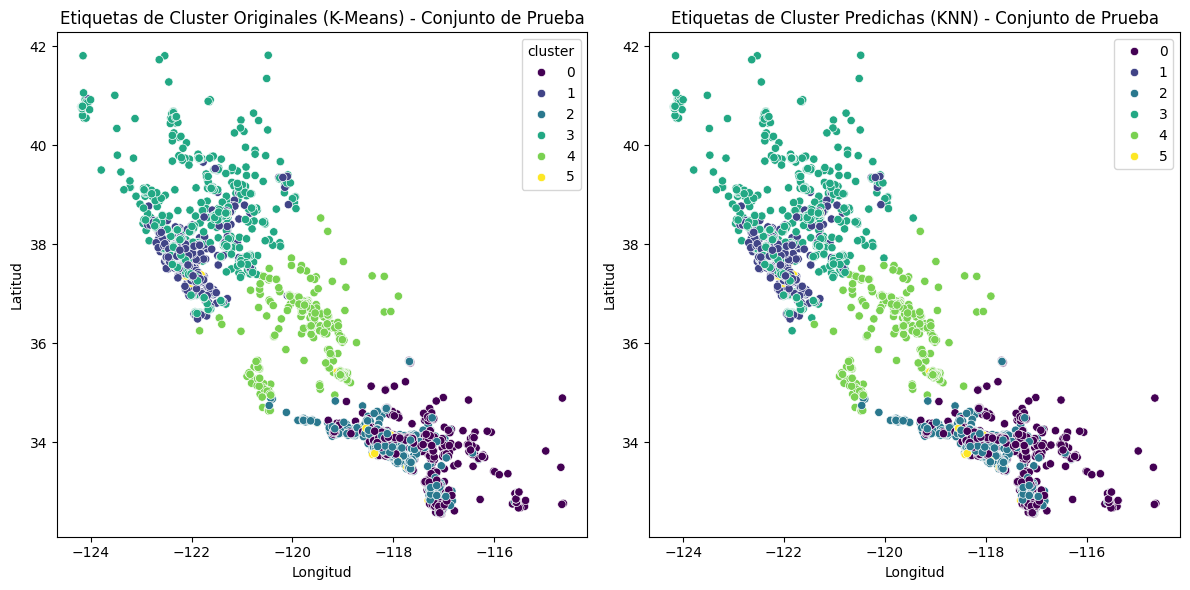

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=test_df_housing, x='Longitude', y='Latitude', hue='cluster', palette='viridis')
plt.title('Etiquetas de Cluster Originales (K-Means) - Conjunto de Prueba')
plt.xlabel('Longitud')
plt.ylabel('Latitud')


plt.subplot(1, 2, 2)
sns.scatterplot(data=test_df_housing, x='Longitude', y='Latitude', hue=y_pred_knn, palette='viridis')
plt.title('Etiquetas de Cluster Predichas (KNN) - Conjunto de Prueba')
plt.xlabel('Longitud')
plt.ylabel('Latitud')

plt.tight_layout()
plt.show()

El modelo KNN aprendió y se adapta de manera excelente al modelo no supervisado K-Means, después de que K-Means agrupara los datos de las viviendas en 6 clusters basándose en su ubicación geográfica e ingreso medio

In [14]:
import joblib
import os

# Crear la carpeta 'models' si no existe
models_folder = 'models'
os.makedirs(models_folder, exist_ok=True)

# Guardar el modelo K-Means
kmeans_filename = os.path.join(models_folder, 'kmeans_model_housing.joblib')
joblib.dump(kmeans_housing, kmeans_filename)
print(f"Modelo K-Means guardado en: {kmeans_filename}")

# Guardar el modelo KNN
knn_filename = os.path.join(models_folder, 'knn_model_housing.joblib')
joblib.dump(knn_classifier, knn_filename)
print(f"Modelo KNN guardado en: {knn_filename}")

Modelo K-Means guardado en: models/kmeans_model_housing.joblib
Modelo KNN guardado en: models/knn_model_housing.joblib
